<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/cnn/bilstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 28s 111ms/step - loss: 0.6527 - accuracy: 0.5883 - val_loss: 0.3804 - val_accuracy: 0.8396
Epoch 2/100
176/176 [==============================] - 19s 106ms/step - loss: 0.3098 - accuracy: 0.8702 - val_loss: 0.3120 - val_accuracy: 0.8719
Epoch 3/100
176/176 [==============================] - 19s 107ms/step - loss: 0.2233 - accuracy: 0.9137 - val_loss: 0.2842 - val_accuracy: 0.8798
Epoch 4/100
176/176 [==============================] - 19s 107ms/step - loss: 0.1782 - accuracy: 0.9374 - val_loss: 0.2995 - val_accuracy: 0.8827
Epoch 5/100
176/176 [==============================] - 19s 107ms/step - loss: 0.1537 - accuracy: 0.9439 - val_loss: 0.3170 - val_accuracy: 0.8801
Epoch 6/100
176/176 [==============================] - 19s 107ms/step - loss: 0.1282 - accuracy: 0.9564 - val_loss: 0.3192 - val_accuracy: 0.8746
Epoch 7/100
176/176 [==============================] - 19s 107ms/step - loss: 0.1077 - accuracy: 0.9646 - v

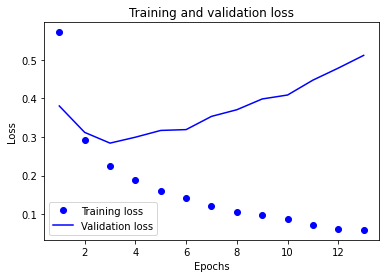

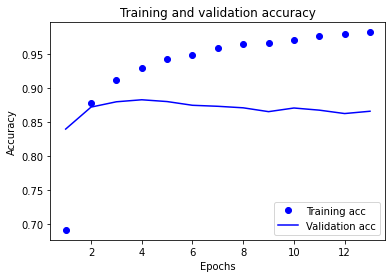

              precision    recall  f1-score   support

           0      0.855     0.914     0.884     12500
           1      0.908     0.846     0.875     12500

    accuracy                          0.880     25000
   macro avg      0.882     0.880     0.880     25000
weighted avg      0.882     0.880     0.880     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 22s 109ms/step - loss: 0.6574 - accuracy: 0.5855 - val_loss: 0.3861 - val_accuracy: 0.8350
Epoch 2/100
176/176 [==============================] - 19s 107ms/step - loss: 0.3468 - accuracy: 0.8540 - val_loss: 0.3028 - val_accuracy: 0.8737
Epoch 3/100
176/176 [==============================] - 19s 107ms/step - loss: 0.2622 - accuracy: 0.8975 - val_loss: 0.3081 - val_accuracy: 0.8725
Epoch 4/100
176/176 [==============================] - 19s 108ms/step - loss: 0.1988 - accuracy: 0.9248 - val_loss: 0.2859 - val_accuracy: 0.8811
Epoch 5/100
176/176 [==============================] - 19s 107ms/step -

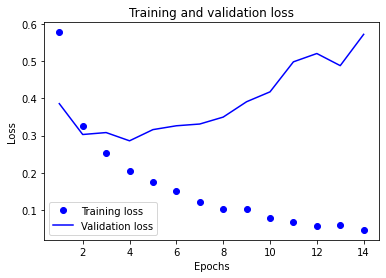

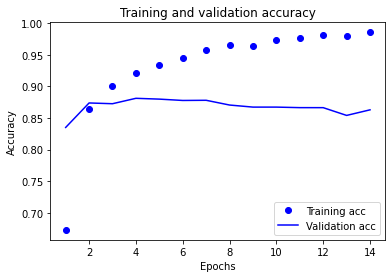

              precision    recall  f1-score   support

           0      0.864     0.904     0.884     12500
           1      0.899     0.858     0.878     12500

    accuracy                          0.881     25000
   macro avg      0.882     0.881     0.881     25000
weighted avg      0.882     0.881     0.881     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 22s 109ms/step - loss: 0.6509 - accuracy: 0.5877 - val_loss: 0.4154 - val_accuracy: 0.8235
Epoch 2/100
176/176 [==============================] - 19s 106ms/step - loss: 0.3220 - accuracy: 0.8673 - val_loss: 0.2834 - val_accuracy: 0.8821
Epoch 3/100
176/176 [==============================] - 19s 107ms/step - loss: 0.2212 - accuracy: 0.9160 - val_loss: 0.2825 - val_accuracy: 0.8850
Epoch 4/100
176/176 [==============================] - 19s 106ms/step - loss: 0.2005 - accuracy: 0.9236 - val_loss: 0.2991 - val_accuracy: 0.8813
Epoch 5/100
176/176 [==============================] - 19s 107ms/step -

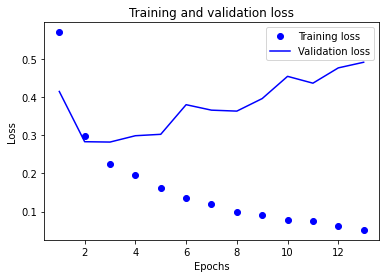

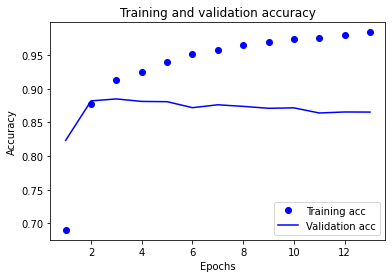

              precision    recall  f1-score   support

           0      0.896     0.871     0.883     12500
           1      0.875     0.899     0.887     12500

    accuracy                          0.885     25000
   macro avg      0.885     0.885     0.885     25000
weighted avg      0.885     0.885     0.885     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 22s 111ms/step - loss: 0.6710 - accuracy: 0.5651 - val_loss: 0.5618 - val_accuracy: 0.7259
Epoch 2/100
176/176 [==============================] - 19s 106ms/step - loss: 0.4283 - accuracy: 0.8093 - val_loss: 0.2920 - val_accuracy: 0.8758
Epoch 3/100
176/176 [==============================] - 19s 107ms/step - loss: 0.2499 - accuracy: 0.9048 - val_loss: 0.2772 - val_accuracy: 0.8838
Epoch 4/100
176/176 [==============================] - 19s 107ms/step - loss: 0.2028 - accuracy: 0.9274 - val_loss: 0.2778 - val_accuracy: 0.8841
Epoch 5/100
176/176 [==============================] - 19s 107ms/step -

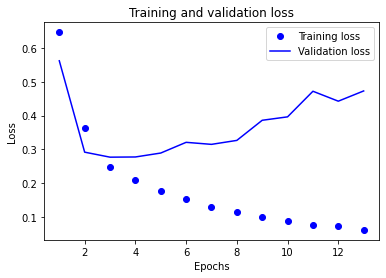

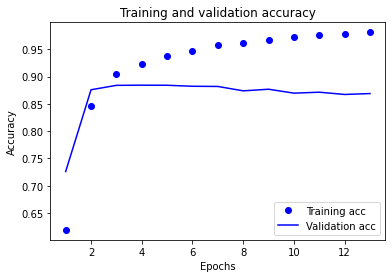

              precision    recall  f1-score   support

           0      0.895     0.870     0.882     12500
           1      0.873     0.898     0.885     12500

    accuracy                          0.884     25000
   macro avg      0.884     0.884     0.884     25000
weighted avg      0.884     0.884     0.884     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 22s 111ms/step - loss: 0.6631 - accuracy: 0.5803 - val_loss: 0.3620 - val_accuracy: 0.8572
Epoch 2/100
176/176 [==============================] - 19s 107ms/step - loss: 0.3220 - accuracy: 0.8747 - val_loss: 0.2844 - val_accuracy: 0.8816
Epoch 3/100
176/176 [==============================] - 19s 106ms/step - loss: 0.2257 - accuracy: 0.9164 - val_loss: 0.2805 - val_accuracy: 0.8828
Epoch 4/100
176/176 [==============================] - 19s 106ms/step - loss: 0.1921 - accuracy: 0.9298 - val_loss: 0.2983 - val_accuracy: 0.8813
Epoch 5/100
176/176 [==============================] - 19s 106ms/step -

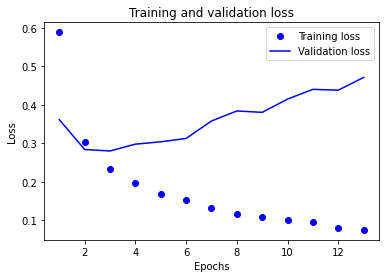

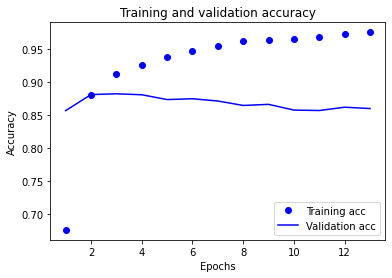

              precision    recall  f1-score   support

           0      0.875     0.893     0.884     12500
           1      0.891     0.872     0.882     12500

    accuracy                          0.883     25000
   macro avg      0.883     0.883     0.883     25000
weighted avg      0.883     0.883     0.883     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 22s 110ms/step - loss: 0.6596 - accuracy: 0.5806 - val_loss: 0.5025 - val_accuracy: 0.7877
Epoch 2/100
176/176 [==============================] - 19s 109ms/step - loss: 0.3845 - accuracy: 0.8354 - val_loss: 0.3086 - val_accuracy: 0.8695
Epoch 3/100
176/176 [==============================] - 19s 108ms/step - loss: 0.2509 - accuracy: 0.8990 - val_loss: 0.2983 - val_accuracy: 0.8742
Epoch 4/100
176/176 [==============================] - 19s 108ms/step - loss: 0.1920 - accuracy: 0.9287 - val_loss: 0.2898 - val_accuracy: 0.8791
Epoch 5/100
176/176 [==============================] - 19s 108ms/step -

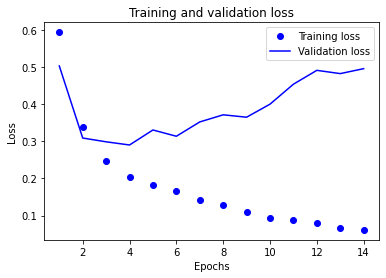

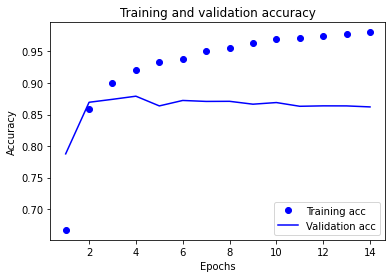

              precision    recall  f1-score   support

           0      0.879     0.880     0.879     12500
           1      0.879     0.879     0.879     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 22s 111ms/step - loss: 0.6532 - accuracy: 0.5853 - val_loss: 0.3318 - val_accuracy: 0.8576
Epoch 2/100
176/176 [==============================] - 19s 109ms/step - loss: 0.2941 - accuracy: 0.8816 - val_loss: 0.2869 - val_accuracy: 0.8811
Epoch 3/100
176/176 [==============================] - 19s 108ms/step - loss: 0.2303 - accuracy: 0.9111 - val_loss: 0.2893 - val_accuracy: 0.8775
Epoch 4/100
176/176 [==============================] - 19s 108ms/step - loss: 0.1796 - accuracy: 0.9348 - val_loss: 0.2952 - val_accuracy: 0.8789
Epoch 5/100
176/176 [==============================] - 19s 108ms/step -

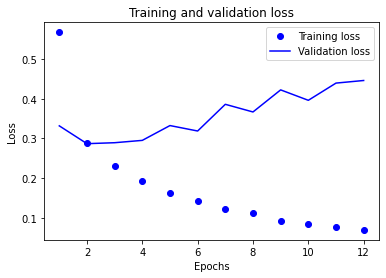

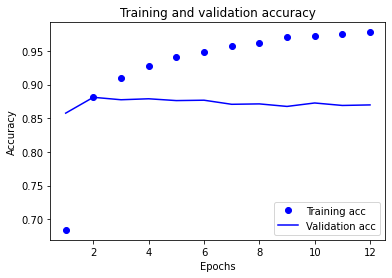

              precision    recall  f1-score   support

           0      0.903     0.854     0.878     12500
           1      0.861     0.909     0.884     12500

    accuracy                          0.881     25000
   macro avg      0.882     0.881     0.881     25000
weighted avg      0.882     0.881     0.881     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 23s 112ms/step - loss: 0.6527 - accuracy: 0.5867 - val_loss: 0.3966 - val_accuracy: 0.8385
Epoch 2/100
176/176 [==============================] - 19s 109ms/step - loss: 0.3403 - accuracy: 0.8582 - val_loss: 0.2962 - val_accuracy: 0.8749
Epoch 3/100
176/176 [==============================] - 19s 108ms/step - loss: 0.2325 - accuracy: 0.9079 - val_loss: 0.2978 - val_accuracy: 0.8726
Epoch 4/100
176/176 [==============================] - 19s 108ms/step - loss: 0.2177 - accuracy: 0.9168 - val_loss: 0.3188 - val_accuracy: 0.8732
Epoch 5/100
176/176 [==============================] - 19s 108ms/step -

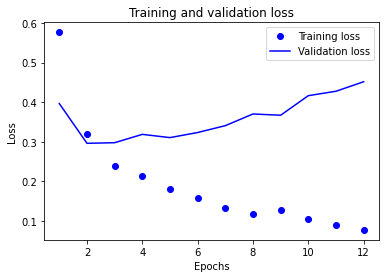

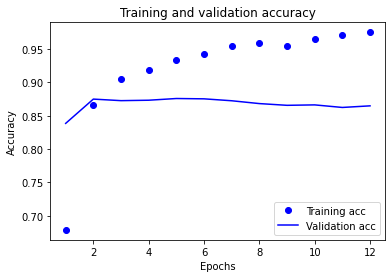

              precision    recall  f1-score   support

           0      0.854     0.904     0.878     12500
           1      0.898     0.846     0.871     12500

    accuracy                          0.875     25000
   macro avg      0.876     0.875     0.875     25000
weighted avg      0.876     0.875     0.875     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 23s 112ms/step - loss: 0.6533 - accuracy: 0.5897 - val_loss: 0.4190 - val_accuracy: 0.8177
Epoch 2/100
176/176 [==============================] - 19s 109ms/step - loss: 0.3490 - accuracy: 0.8527 - val_loss: 0.2984 - val_accuracy: 0.8729
Epoch 3/100
176/176 [==============================] - 19s 110ms/step - loss: 0.2446 - accuracy: 0.9035 - val_loss: 0.2943 - val_accuracy: 0.8750
Epoch 4/100
176/176 [==============================] - 19s 109ms/step - loss: 0.2003 - accuracy: 0.9248 - val_loss: 0.3157 - val_accuracy: 0.8733
Epoch 5/100
176/176 [==============================] - 19s 110ms/step -

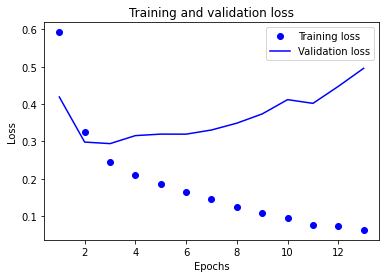

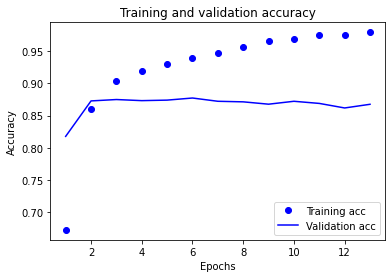

              precision    recall  f1-score   support

           0      0.900     0.844     0.871     12500
           1      0.853     0.906     0.879     12500

    accuracy                          0.875     25000
   macro avg      0.876     0.875     0.875     25000
weighted avg      0.876     0.875     0.875     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 23s 115ms/step - loss: 0.6661 - accuracy: 0.5675 - val_loss: 0.3759 - val_accuracy: 0.8348
Epoch 2/100
176/176 [==============================] - 19s 108ms/step - loss: 0.3221 - accuracy: 0.8646 - val_loss: 0.2835 - val_accuracy: 0.8814
Epoch 3/100
176/176 [==============================] - 19s 108ms/step - loss: 0.2250 - accuracy: 0.9142 - val_loss: 0.2833 - val_accuracy: 0.8828
Epoch 4/100
176/176 [==============================] - 19s 108ms/step - loss: 0.1972 - accuracy: 0.9269 - val_loss: 0.2872 - val_accuracy: 0.8802
Epoch 5/100
176/176 [==============================] - 19s 109ms/step 

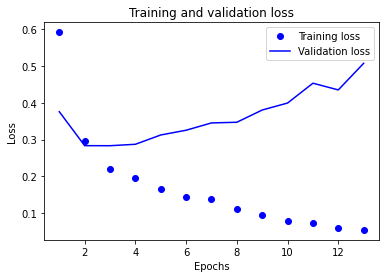

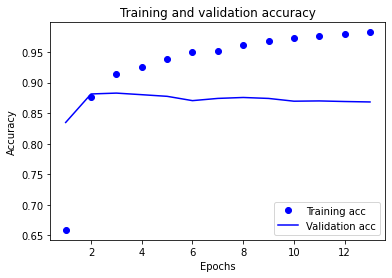

              precision    recall  f1-score   support

           0      0.879     0.887     0.883     12500
           1      0.886     0.878     0.882     12500

    accuracy                          0.883     25000
   macro avg      0.883     0.883     0.883     25000
weighted avg      0.883     0.883     0.883     25000


Average accuracy: 0.8841 (+/- 0.0073)
Average loss: 0.2790 (+/- 0.0065)
Average F1: 0.8803 (+/- 0.0045)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Bidirectional(LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True, return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(units=64, activation="relu"),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
